# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 5

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **20 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [171]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.diagnostic import lilliefors
from tqdm.notebook import tqdm
 

%matplotlib inline


# Критерии согласия

## Теоретическая часть



### Задача 1. (основной поток, 5 баллов)
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


Для таких задач обычно применяют обощённый метод Хи-квдарат. 
Для его применения сначала получим ОМП для $\theta$:

$$ L = \sum_{j=1}^4 \mu_j \ln p_j^0(\theta)$$
$$ \dfrac{dL}{d\theta} = \sum_{j=1}^4 \dfrac{\mu_j \cdot \dfrac{d p_j^0(\theta)}{d \theta}}{p_j^0(\theta)} = 0$$

Решая предложенное уравнение с параметрами данной задачи, получим ОМП: $\widehat \theta =0,208$.

Тогда вероятности: 0,208; 0,416; 0,208; 0,168.
Понятно, что $n > 50$, а $np_j > 5.$ Значит критерий применим.

Теперь вычислим статистику критерия Хи-квадрат:
$$ \widehat \chi = \sum_{j = 1}^{4} \dfrac{(\mu_j - np_j^0(\widehat \theta)) ^2}{np_j^0(\widehat \theta)} $$
Степень свободы одна (у распределения один параметр), значит $d = 1$.
Ну и p-value посчитаем, но это имеет смысл делать уже на питончике:

In [245]:
theta = 0.208
p = np.array([theta, 2 * theta, theta, 1 - 4 * theta])
p_val = sps.chisquare([1010, 2200, 950, 840], p * 5000, 1)[1]
print("p-value:", p_val)
print("Отвергаем:", p_val < 0.05)

p-value: 0.00041449007074133005
Отвергаем: True


## Практическая часть

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 2. (все потоки, 8 баллов)

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.


$n = 200$ отлично подходит - больше 50, теоретический размер корзины равен 20 - больше 5.

In [289]:
size = 200
count = 100
sample = sps.randint(1, 11).rvs(size=(count, size))
unique, counts = np.unique(sample, return_counts=True)
st, p = sps.chisquare(unique)
print("p-value:", round(p, 3))
print("Отвергаем:", p < 0.05)

p-value: 0.091
Отвергаем: False


**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




In [283]:
size = 1000
sample = sps.poisson(mu=5).rvs(size=1000)

unique, counts = np.unique(sample, return_counts=True)

values = np.zeros(8)
values[0] = np.sum(counts[:3])
values[1:7] = counts[3:9]
values[-1] = np.sum(counts[9:])
print(values)

[131. 146. 177. 171. 131. 119.  64.  61.]


In [284]:
p = np.zeros(8)
p[0] = np.sum(sps.poisson(mu=5).pmf([0, 1, 2]))
p[1:7] = sps.poisson(mu=5).pmf(np.arange(3, 9))
p[-1] = sps.poisson(mu=5).sf(8)
p *= size
print(p)

[124.65201948 140.37389581 175.46736977 175.46736977 146.22280814
 104.44486296  65.27803935  68.09363472]


Видно, что теоретические размеры корзин больше 5.

In [290]:
st, p = sps.chisquare(values, p)

print("p-value:", p)
print("Отвергаем:", p < 0.05)

p-value: 0.0
Отвергаем: True


**Вывод:** проверка гиипотезы принадлежности выборок, генерируемых библиотекой scipy.stats заданным распределением не отвергла её. Исключения случаются, но это связано с несовершенством Хи-квадрат (хотя были проверены все условия применимости - размеры всех выборок больше 50, теоретический размер каждой корзины юольше 50) и с конечным размером выборки.  

__________________
### Задача 3. (основной поток, 8 баллов)

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка;
* Лиллиефорса.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можно взять реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>. Критерий Колмогорова можно попробовать применить для конкретной $F_0$ (оценив ее), пример использования можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На лекции 7 разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [239]:
max_sample_size = 100
sample_count = 10 ** 4
sample_full = sps.norm().rvs(size=(sample_count, max_sample_size))
is_reject_colm = np.zeros((max_sample_size, sample_count))
is_reject_lili = np.zeros((max_sample_size, sample_count))
is_reject_zharka = np.zeros((max_sample_size, sample_count))
is_reject_shapira = np.zeros((max_sample_size, sample_count))


# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sample_full[j][:i]
        
        st, p = sps.kstest(sample, cdf=sps.norm.cdf)
        is_reject_colm[i, j] = int(p < 0.05)
        
        st, p = lilliefors(sample)
        is_reject_lili[i, j] = int(p < 0.05)
        
        st, p = sps.jarque_bera(sample)
        is_reject_zharka[i, j] = int(p < 0.05)
        
        st, p = sps.shapiro(sample)
        is_reject_shapira[i, j] = int(p < 0.05)
        
        
lev_сolm = is_reject_colm.mean(axis=1)
lev_lili = is_reject_lili.mean(axis=1)
lev_zharka = is_reject_zharka.mean(axis=1)
lev_shapira = is_reject_shapira.mean(axis=1)

  0%|          | 0/95 [00:00<?, ?it/s]

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

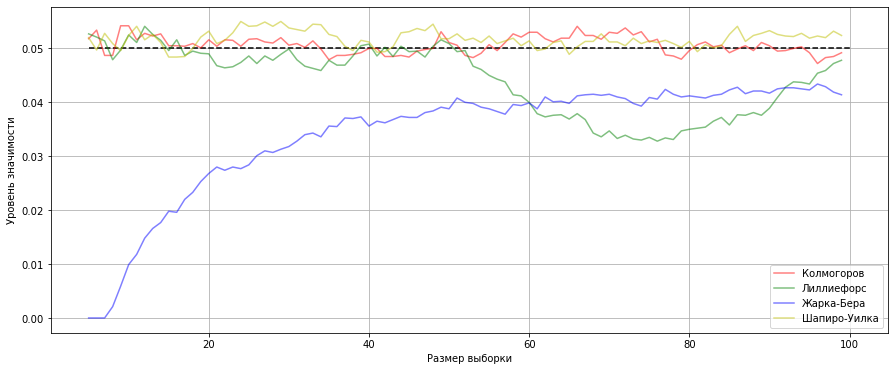

In [288]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(5, max_sample_size), lev_сolm[5:], color="r", alpha=0.5, label="Колмогоров")
plt.plot(np.arange(5, max_sample_size), lev_lili[5:], color="g", alpha=0.5, label="Лиллиефорс")
plt.plot(np.arange(5, max_sample_size), lev_zharka[5:], color="b", alpha=0.5, label="Жарка-Бера")
plt.plot(np.arange(5, max_sample_size), lev_shapira[5:], color="y", alpha=0.5, label="Шапиро-Уилка")
plt.hlines(0.05, 5, 100, color="black", ls="--")
plt.xlabel("Размер выборки")
plt.ylabel("Уровень значимости")
plt.legend()
plt.grid()

Какой можно сделать вывод?

1) Критерии Колмогорова и Лиллиефорса ОЧЕНЬ ОЧЕНЬ долго считаются

2) Реальный уровень доверия лучше всего:
   - на малых размерах - Жарка-Бера
   - на средних размерах - Лиллиефорса
   - критерии Шапиро-Уилка и Колмогорова показывают примерно одинаковые результаты порядка 0.05

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [237]:
max_sample_size = 100
sample_count = 10 ** 4
sample_full = sps.cauchy().rvs(size=(sample_count, max_sample_size))
is_reject_colm = np.zeros((max_sample_size, sample_count))
is_reject_lili = np.zeros((max_sample_size, sample_count))
is_reject_zharka = np.zeros((max_sample_size, sample_count))
is_reject_shapira = np.zeros((max_sample_size, sample_count))


# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sample_full[j][:i]
        
        st, p = sps.kstest(sample, cdf=sps.norm.cdf)
        is_reject_colm[i, j] = int(p < 0.05)
        
        st, p = lilliefors(sample)
        is_reject_lili[i, j] = int(p < 0.05)
        
        st, p = sps.jarque_bera(sample)
        is_reject_zharka[i, j] = int(p < 0.05)
        
        st, p = sps.shapiro(sample)
        is_reject_shapira[i, j] = int(p < 0.05)
        
        
real_сolm = is_reject_colm.mean(axis=1)
real_lili = is_reject_lili.mean(axis=1)
real_zharka = is_reject_zharka.mean(axis=1)
real_shapira = is_reject_shapira.mean(axis=1)

  0%|          | 0/95 [00:00<?, ?it/s]

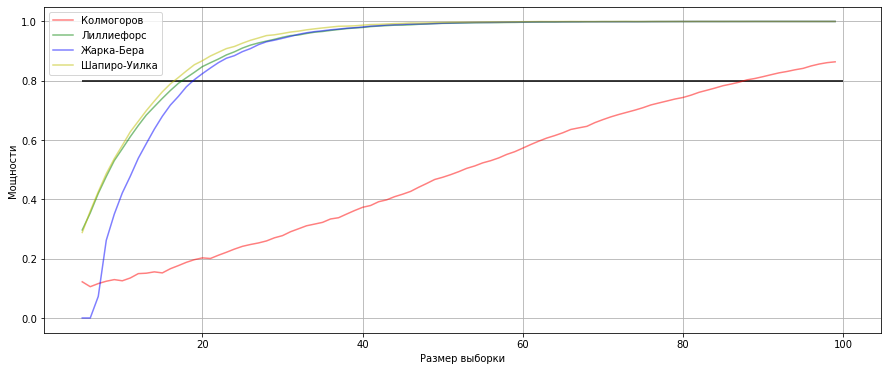

In [287]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(5, max_sample_size), real_сolm[5:], color="r", alpha=0.5, label="Колмогоров")
plt.plot(np.arange(5, max_sample_size), real_lili[5:], color="g", alpha=0.5, label="Лиллиефорс")
plt.plot(np.arange(5, max_sample_size), real_zharka[5:], color="b", alpha=0.5, label="Жарка-Бера")
plt.plot(np.arange(5, max_sample_size), real_shapira[5:], color="y", alpha=0.5, label="Шапиро-Уилка")
plt.hlines(0.8, 5, 100, color="black")
plt.xlabel("Размер выборки")
plt.ylabel("Мощности")
plt.legend()
plt.grid()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

**Вывод:** самый мощный метод при данной альтернативе - Шапиро-Уилка. Критерий Колмогорова показывает значение мощности гораздо ниже (что неудивительно в силу его универсальности). Примерно одинаковы по мощности критерии Шапиро-Уилка и Лиллиефорса, но Шапиро-Уилка считается быстрее и выше, так что лучше использовать его. При малых размерах выборки критерий Жарко-Бера показывает более низкую мощность, что неудивительно, учитывая то, что он выигрывает по уровню значимости.

**3*.** (4 балла) Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

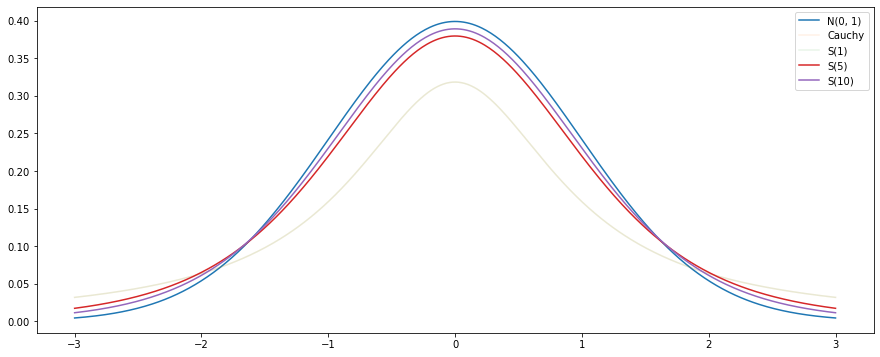

In [209]:
grid = np.linspace(-3, 3, 500)
norm = sps.norm.pdf(grid)
cau = sps.cauchy.pdf(grid)
s_1 = sps.t(df=1).pdf(grid)
s_5 = sps.t(df=5).pdf(grid)
s_10 = sps.t(df=10).pdf(grid)

plt.figure(figsize=(15, 6))
plt.plot(grid, norm, label="N(0, 1)")
plt.plot(grid, cau, label="Cauchy", alpha=0.1)
plt.plot(grid, s_1, label="S(1)", alpha=0.1)
plt.plot(grid, s_5, label="S(5)")
plt.plot(grid, s_10, label="S(10)")
plt.legend()

Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [ ]:
<...>

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

<...>

__________________
### Задача 4. (основной поток, 12 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

In [212]:
columns = ["Wine type", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", 
         "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
         "Hue",  "OD280/OD315 of diluted wines", "Proline"]


data = pd.read_csv('wine.data', names=columns)
data.head()

,Wine type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

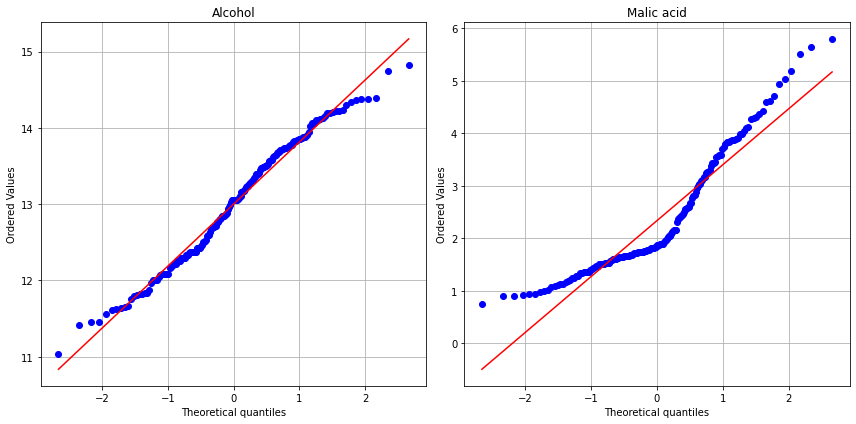

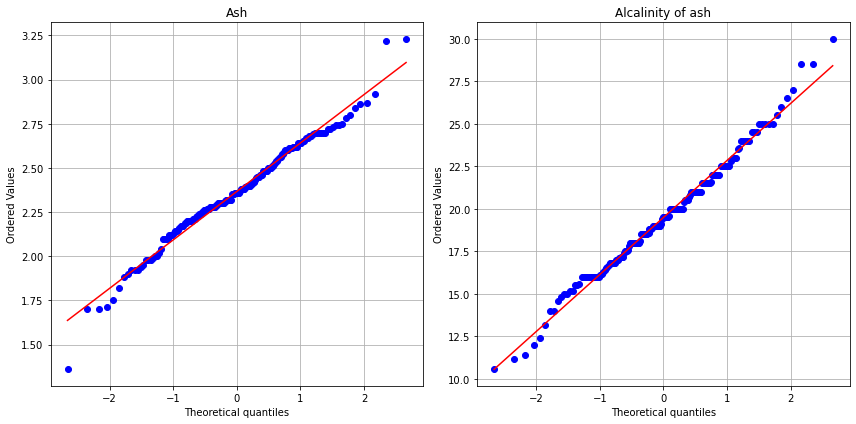

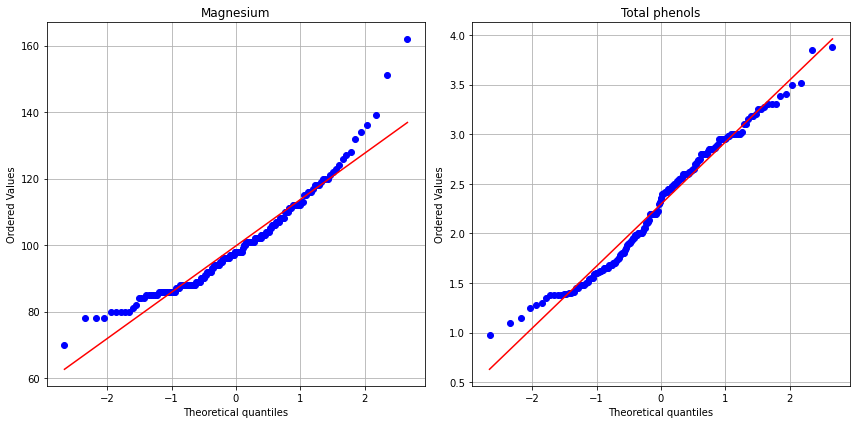

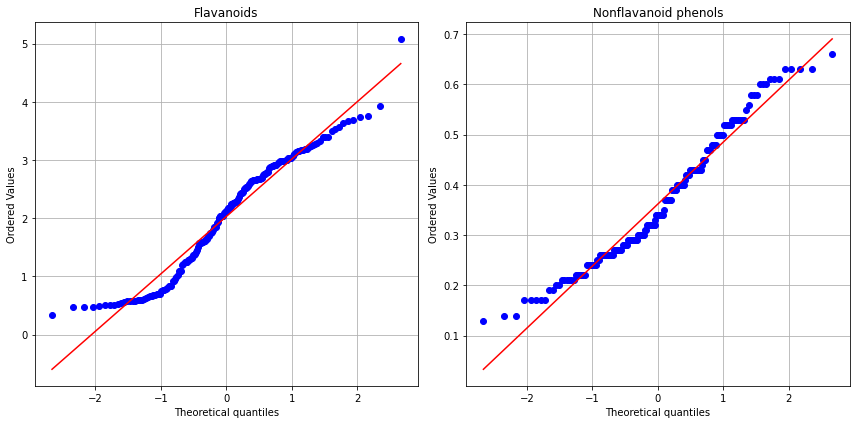

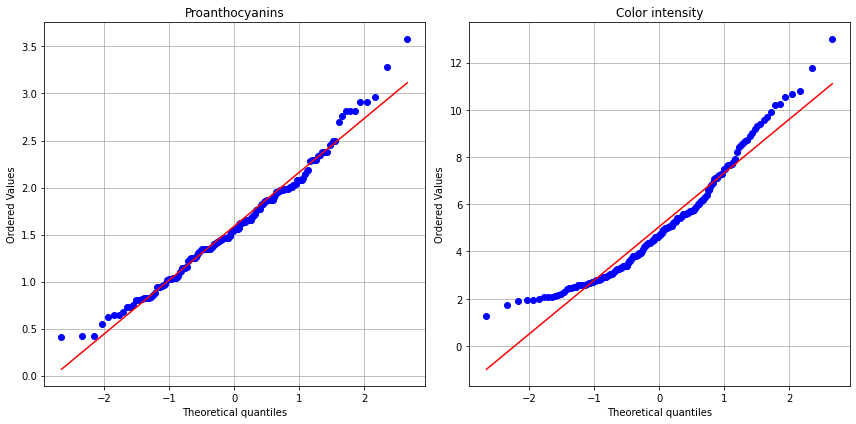

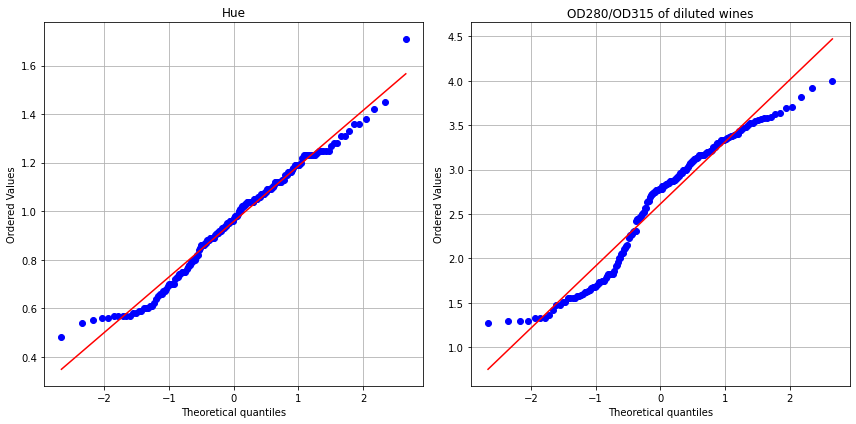

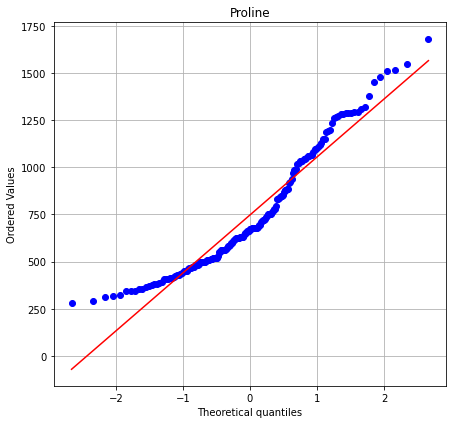

In [221]:
for i in range(0, len(columns[1:]), 2):
    plt.figure(figsize=(12, 6))
    
    place = plt.subplot(1, 2, 1)
    sps.probplot(data[columns[i+1]], plot=place)
    place.set_title(columns[i+1])
    plt.grid()
    
    if i == 12:
        plt.tight_layout()
        break
        
    place = plt.subplot(1, 2, 2)
    sps.probplot(data[columns[i+2]], plot=place)
    place.set_title(columns[i+2])
    plt.grid()
    
    plt.tight_layout()
    plt.show()

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** Alcohol, Ash, Alcanity of ash, Total phenols, Proanthocyanins, Hue предположительно могут иметь нормальное распредление, так как их Q-Q plot в центре почти не отходит от прямой.

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** так как распределение нормальные, используем Лиллиефорса, Жарка-Бера, Шапиро-Уилка, у Колмогорова слишком маленькая мощность.

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:**  для минимизации групповой ошибки первого рода.

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** для разных признаков выборка вин одна и таже, значит статистики не независимы, берём общий метод контроля - метод Холм.

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** для этого нам необходимо задать правильный уровень значимости для метода, а потом вычислить скорректированный p-value по данному методу, далее сравнивать p-value(corrected) с уровнем значимости.

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** если данные не противоречат проверяемым свойствам распредления, то можно считать, что выборка согласуется с основной гипотезой.

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [246]:
methods = ["Лиллиефорс", "Жарка-Бера", "Шапиро-Уилка"]
criteria = [lilliefors, sps.jarque_bera, sps.shapiro]
sample = data[columns]
p_vals = []
sm = {}
for name in columns:
    sm[name] = {}
    for f, method in zip(criteria, methods):
        p_val = f(sample[name])[1]
        sm[name][method + ' p-value'] = p_val
        p_vals.append(p_val)
rej, p_cor = multipletests(p_vals, method='holm', alpha=0.05)[:2]


for i, name in enumerate(columns):
    for k, method in enumerate(methods):
        sm[name][method + ' p-value_corr'] = p_vals[3*i + k]
    sm[name]['Отвергаем'] = (True in rej[3*i : 3*i+3])
table_data = pd.DataFrame(sm)
table_data.T[1:]

,Лиллиефорс p-value,Жарка-Бера p-value,Шапиро-Уилка p-value,Лиллиефорс p-value_corr,Жарка-Бера p-value_corr,Шапиро-Уилка p-value_corr,Отвергаем
Alcohol,0.058382,0.061068,0.020052,0.058382,0.061068,0.020052,False
Malic acid,0.001,0.0,0.0,0.001,0.0,0.0,True
Ash,0.186504,0.008486,0.038685,0.186504,0.008486,0.038685,False
Alcalinity of ash,0.098863,0.250934,0.263869,0.098863,0.250934,0.263869,False
Magnesium,0.002494,0.0,0.000001,0.002494,0.0,0.000001,True
Total phenols,0.035086,0.063122,0.004396,0.035086,0.063122,0.004396,False
Flavanoids,0.004657,0.052731,0.000017,0.004657,0.052731,0.000017,True
Nonflavanoid phenols,0.001,0.010714,0.000106,0.001,0.010714,0.000106,True
Proanthocyanins,0.216578,0.007841,0.014453,0.216578,0.007841,0.014453,False
Color intensity,0.002182,0.000011,0.000001,0.002182,0.000011,0.000001,True


Для каких признаков нормальность не отвергается?

**Ответ:** распредления Alcohol, Ash, Alcanity of ash, Total phenols, Proanthocyanins, Hue согласуются с оснвной гипотезой, т.е. что они распределены нормально. 

**Вывод:** мы использовали методы Q-Q plot и МПГ (с применением критериев согласия) для того, чтобы оценить, распределения каких параметров вина можно считать нормальным. Очевидно, второй метод гораздо надёжнее, так как определять нормальность по Q-Q plot на глаз - метод заметно менее достоверный, а потому отвергающий только самые непохожие на гипотезу варианты. МПГ применялась с контролем FWER методом Холма, так как выборка одна статистики нельзя считать независимыми. 